### Imports

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Read data from git repo

Reaeding in the pre-mapped data

In [39]:
# Read in dataset & fill "?" values with na
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/mapped_diabetes.csv", na_values='?')
df.head()

c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Trauma Center,Unknown/Invalid,Physician Referral,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


### df shape

In [40]:
df.shape

(101766, 51)

### Handling NA values

Some of the mapped values included Not mapped and Not Available, so those values were replaced with NAN.
Then the % of missing values for each feature to evaluate the impact.

In [41]:
# Replace '?' with Nan
df = df.replace([' Not Mapped', ' Not Available', 'Not Mapped', 'Not Available'], np.NAN)

# Count missing values
df_na = pd.DataFrame(df.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na

,count,percent_missing
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
admission_source_id,7067,0.069444
admission_type_id,5136,0.050469
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
discharge_disposition_id,62,0.000609
diag_1,21,0.000206


### Check value counts for mapped values

In [42]:
print(df['admission_source_id'].value_counts())

 Emergency Room                                               57494
 Physician Referral                                           29565
Transfer from a hospital                                       3187
 Transfer from another health care facility                    2264
Clinic Referral                                                1104
 Transfer from a Skilled Nursing Facility (SNF)                 855
HMO Referral                                                    187
 Court/Law Enforcement                                           16
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
Normal Delivery                                                   2
 Extramural Birth                                                 2
 Transfer from Ambulatory Surgery Center                          2
 Sick Baby                                                        1
Name: admission_source_id, dtype: int64


In [43]:
print(df['admission_type_id'].value_counts())

Urgent           53990
Newborn          18869
Elective         18480
Trauma Center     5291
Name: admission_type_id, dtype: int64


In [44]:
print(df['discharge_disposition_id'].value_counts())

Discharged/transferred to another short term hospital                                                        60234
Discharged/transferred to ICF                                                                                13954
Left AMA                                                                                                     12902
Expired at home. Medicaid only, hospice.                                                                      3691
Discharged/transferred to SNF                                                                                 2128
Discharged/transferred to a long term care hospital.                                                          1993
Still patient or expected to return for outpatient services                                                   1642
Discharged/transferred to home with home health service                                                       1184
Unknown/Invalid                                                                 

### Impute data

In [45]:
df_impute = df

# drop weight
df_impute.drop(columns=['weight'], axis=1, inplace=True)

# fill NA - medical_specialty, payer_code, race, 
df_impute.medical_specialty = df_impute.medical_specialty.fillna('NA')
df_impute.payer_code = df_impute.payer_code.fillna('NA')
df_impute.admission_source_id = df_impute.admission_source_id.fillna('NA')
df_impute.admission_type_id = df_impute.admission_type_id.fillna('NA')
df_impute.race = df_impute.race.fillna('NA')
df_impute.discharge_disposition_id = df_impute.discharge_disposition_id.fillna('Unknown/Invalid')
df_impute.diag_1 = df_impute.diag_1.fillna('NA')
df_impute.diag_2 = df_impute.diag_2.fillna('NA')
df_impute.diag_3 = df_impute.diag_3.fillna('NA')


In [46]:
df_impute.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


### Model Preperations

#### Target Variable - **readmitted**

Objective:
<li>Predict if a patient will re-admit at the hospital within 30 days of the initial admitted.</li>
<br>


There are 3 unique values in the **readmitted** target variable as shown below...
<li>values with 'less30' in the "readmitted" column were given the value 1 in the "was_readmitted" column
<li>any other values in the "readmitted" column were given the value of 0 in the "was_readmitted" column

In [47]:
df_model = df_impute

print(df_model["readmitted"].value_counts())
print(df_model["was_readmitted"].value_counts())


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
0    90409
1    11357
Name: was_readmitted, dtype: int64


### Categorical Variables

Reassesing categorical variables to see if some variables needed to be adjust before applying one-hot-coding.

In [48]:
df_object = df_model.select_dtypes(include=['object_'])
df_object.describe().transpose()

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
admission_type_id,101766,5,Urgent,53990
discharge_disposition_id,101766,24,Discharged/transferred to another short term h...,60234
admission_source_id,101766,15,Emergency Room,57494
payer_code,101766,18,NA,40256
medical_specialty,101766,73,NA,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752


**medical_specialty, diag_1, diag_1, and diag_3** has 73, 717, 749, and 790 unique values, respectively. These will be complicated for Logistic Regression model that the team planned to use for this prediction.

Therefore, to reduce the complication of one-hot-coding, we groupped the values in each column that appear <1% of the dataset (1,018 records) as 'Others'. 

In [49]:
def major(cols):
    x = df_model.groupby(by=cols, as_index=False).agg({'encounter_id': pd.Series.nunique})
    x.rename(columns={x.columns[0]: 'val', x.columns[1]: 'count'}, inplace = True)
    x['percent_appears'] = x['count']/df_model.shape[0]
    x = x[x['percent_appears'] > .01]
    row_to_list = x['val'].to_list()
    return row_to_list

medical_specialty_major = major(df_model['medical_specialty'])
df_model['medical_specialty_reduced'] = np.where(~df_model['medical_specialty'].isin(medical_specialty_major), "Others", df_model['medical_specialty'])
df_model.drop(columns=['medical_specialty'], axis=1, inplace=True)

diag1_major = major(df_model['diag_1'])
df_model['diag_1_reduced'] = np.where(~df_model['diag_1'].isin(diag1_major), "Others", df_model['diag_1'])
df_model.drop(columns=['diag_1'], axis=1, inplace=True)

diag2_major = major(df_model['diag_2'])
df_model['diag_2_reduced'] = np.where(~df_model['diag_2'].isin(diag2_major), "Others", df_model['diag_2'])
df_model.drop(columns=['diag_2'], axis=1, inplace=True)

diag3_major = major(df_model['diag_3'])
df_model['diag_3_reduced'] = np.where(~df_model['diag_3'].isin(diag3_major), "Others", df_model['diag_3'])
df_model.drop(columns=['diag_3'], axis=1, inplace=True)

In [50]:
# drop readmitted
df_model.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)
# df_model.drop(columns=['medical_specialty_reduced', 'payer_code'], axis=1, inplace=True)

In [51]:
df_model.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,was_readmitted,medical_specialty_reduced,diag_1_reduced,diag_2_reduced,diag_3_reduced
0,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,41,0,...,No,No,No,No,No,0,Others,Others,Others,NA
1,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,59,0,...,No,No,No,Ch,Yes,0,NA,276,250.01,Others
2,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,11,5,...,No,No,No,No,Yes,0,NA,Others,250,Others
3,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,44,1,...,No,No,No,Ch,Yes,0,NA,Others,Others,403
4,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,51,0,...,No,No,No,Ch,Yes,0,NA,Others,Others,250


## One-hot Encode
One-hot encode categorical variables then drop originals.

In [52]:
df_object = df_model.select_dtypes(include=['object_'])

Categoricals_to_convert = list(df_object)

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(df_model[Categoricals_to_convert],drop_first=True)

#dropping original columns
df_model = df_model.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
df_model = pd.concat([df_model,dummies],axis=1)

df_model.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,was_readmitted,race_Asian,...,diag_3_reduced_427,diag_3_reduced_428,diag_3_reduced_496,diag_3_reduced_585,diag_3_reduced_599,diag_3_reduced_707,diag_3_reduced_780,diag_3_reduced_NA,diag_3_reduced_Others,diag_3_reduced_V45
0,1,41,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,59,0,18,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,44,1,16,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,51,0,8,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model

### Imports

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


### Create 10% holdout set

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_valid_index in split.split(df_model, df_model.was_readmitted):
    modeling_data = df_model.iloc[train_index]
    validation_data = df_model.iloc[test_valid_index]

In [55]:
print("Size of modeling set (to be CV split): ", modeling_data.shape)
print("Size of hold back validation set: ", validation_data.shape)

Size of modeling set (to be CV split):  (91589, 216)
Size of hold back validation set:  (10177, 216)


In [56]:
# modeling_data.to_csv('df_modeling.csv', sep=',', encoding='utf-8')
# validation_data.to_csv('df_validation.csv', sep=',', encoding='utf-8')

### Setup modeling data

In [57]:
#Create new X predictor matrix
X_model = modeling_data.drop(['was_readmitted'],axis=1) #droping target
y_model = modeling_data['was_readmitted']
y_model = y_model.astype(int)

### Setup validation data

In [58]:
#Create new X predictor matrix
X_validate = validation_data.drop(['was_readmitted'],axis=1) #droping target
y_validate = validation_data['was_readmitted']
y_validate = y_validate.astype(int)

### Create scalar object

Using "ColumnTransform" to scale only the continous variabels using the standard scalar

In [59]:
#Scale new predictor matrix

con_vars = ['time_in_hospital', 'number_diagnoses',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient',
]

scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), con_vars)],
                                          remainder='passthrough') # Default is to drop untransformed columns

### Define model

In [60]:
lr = LogisticRegression(penalty='elasticnet', C=10, l1_ratio=0.01, class_weight='balanced', solver='saga', max_iter=100, multi_class='auto', tol=.0001, random_state=42)

### Setup pipeline

Configuring the pipline to properly scale the data for cross validation, and run the data through the logistic regression model.

In [61]:
pipeline = Pipeline([
    ('scaler', scalar_obj),
    ('classifier', lr)
])

### Setup Scorer

In [62]:
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro')
}

### CV using all variables...

5 fold cross validation was used to train the model, and the results from each fold were consistent not causing concern for overfitting <br>
So we moved forward with training our model on the entire traing set.

In [63]:
model_res = cross_validate(pipeline, X_model, y_model, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_res['test_accuracy'].mean())
print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())

c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Mean Accuracy =  0.6644138046746145
Mean Precision =  0.5521948099300784
Mean Recall =  0.6196736930965602
Mean F1 =  0.5270214888334797


c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Fit using all variables...

In [64]:
# Base model
base_model = lr.fit(X_model,y_model)
# print(base_model.score(X_validate,y_validate)) # Return accuracy

c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### (Not sure why) CV predict on the validation set

In [65]:
# Is this re-fitting the base model....
# Use CV to evaulate base models performance on the validation dataset
valid_res = cross_val_predict(pipeline,X_validate, y_validate, cv=5)
print(classification_report(valid_res, valid_res))

c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6552
           1       1.00      1.00      1.00      3625

    accuracy                           1.00     10177
   macro avg       1.00      1.00      1.00     10177
weighted avg       1.00      1.00      1.00     10177



c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Use best model to predict validation dataset

In [66]:
# Best model
best_model = base_model

### (Not sure why) CV predict on the validation set

In [67]:
# Is this re-fitting the best model....
# Use CV to evaulate best models performance on the validation dataset
valid_res = cross_val_predict(pipeline,X_validate, y_validate, cv=5)
print(classification_report(valid_res, valid_res))

c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6552
           1       1.00      1.00      1.00      3625

    accuracy                           1.00     10177
   macro avg       1.00      1.00      1.00     10177
weighted avg       1.00      1.00      1.00     10177



c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Function for confusion plot

In [68]:
def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # x_axis_labels = ['<30', '>30']
    # y_axis_labels = ['<30', '>30']
    ax = plt.axes()
    # sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('   Hospital Readmission Confusion Matrix\n')
    plt.xlabel("Predicted Readmission")
    plt.ylabel("True Readmission") 


## Make predictions on hold back validation set to compare metrics to the CV model

### Threshold 0.5

A threshold of 0.5 yieled a percision of 0.19, a recall of 0.60 and an F1 score of 0.29.<br>

In [69]:
THRESHOLD = 0.5
lr_validation_predictions = np.where(best_model.predict_proba(X_validate)[:,1] > THRESHOLD, 1, 0)

print(classification_report(y_validate,lr_validation_predictions))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79      9041
           1       0.19      0.60      0.29      1136

    accuracy                           0.67     10177
   macro avg       0.56      0.64      0.54     10177
weighted avg       0.85      0.67      0.73     10177



### Treshold 0.45

A threshold of 0.45 yieled a percision of 0.17, a recall of 0.74 and an F1 score of 0.29.<br>

In [70]:
THRESHOLD = 0.45
lr_validation_predictions = np.where(best_model.predict_proba(X_validate)[:,1] > THRESHOLD, 1, 0)

print(classification_report(y_validate,lr_validation_predictions))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69      9041
           1       0.17      0.74      0.27      1136

    accuracy                           0.57     10177
   macro avg       0.56      0.64      0.48     10177
weighted avg       0.86      0.57      0.64     10177



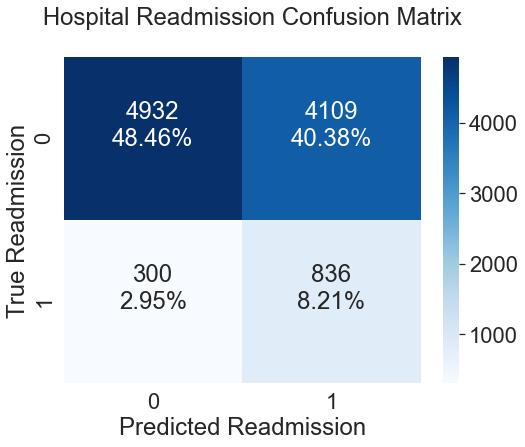

In [71]:
lr_cm = confusion_matrix(y_validate,lr_validation_predictions)
plot_confusion(lr_cm)

### AUC Curve

The AUC for the final models predictions on the hold out set was 0.64

0.6407151848153404


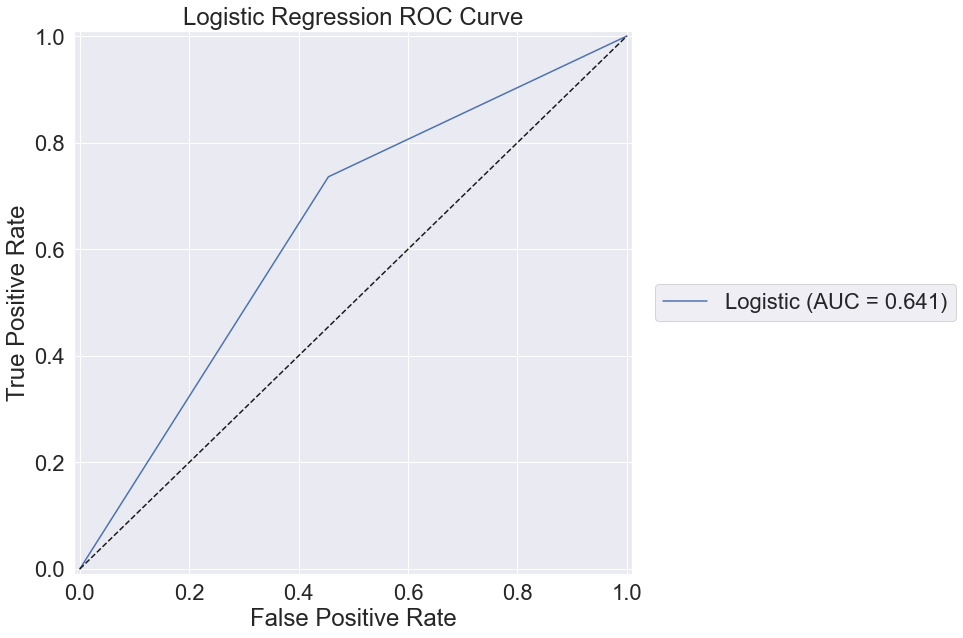

In [72]:
#Calculate probabilities on predictions (not just classifications) needed for AUC
lr_probabilities = best_model.predict_proba(X_validate)


lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_validate, lr_validation_predictions)
lr_auc = roc_auc_score(y_validate, lr_validation_predictions)

print(lr_auc)

# Plot ROC curve
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(lr_fpr, lr_tpr, label='Logistic (AUC = %0.3f)' % lr_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

### Logistic Regression Feature Importance 

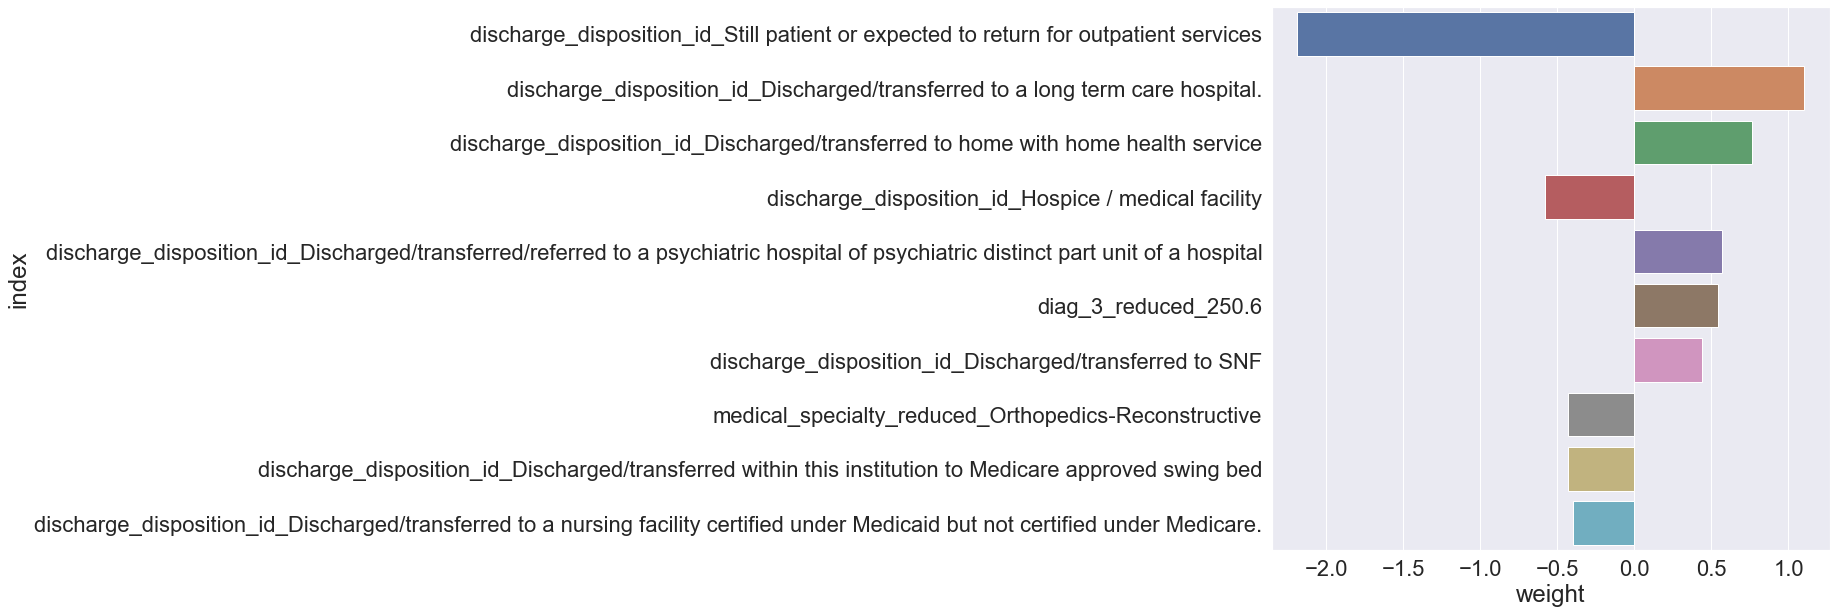

In [73]:
weights = best_model.coef_.T # take transpose to make a column vector
variable_names = X_validate.columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

ax = sns.barplot(y="index", x="weight", data=coefficients.head(10))

### Coefficients

In [74]:
coefficients

,index,weight
0,discharge_disposition_id_Still patient or expe...,-2.187057
1,discharge_disposition_id_Discharged/transferre...,1.103824
2,discharge_disposition_id_Discharged/transferre...,0.760259
3,discharge_disposition_id_Hospice / medical fac...,-0.580768
4,discharge_disposition_id_Discharged/transferre...,0.571520
...,...,...
210,payer_code_UN,0.001991
211,admission_source_id_ Sick Baby,-0.001936
212,time_in_hospital,0.001371
213,num_lab_procedures,0.000280


### Conclusion

The F1 score was slightly lower, in relation to the F1 score for the threshold of 0.50, <br>
but the increase in recall was enough for us to go with the 0.45 model. <br> 
The higher recall was favored because we'd rather have to model flag someone for being at <br>
risk for readmittance who isn't as oppose to missing someone who is not. <br>
The reason for that is we think the potetnital loss of incorrectly flagging someone as <br>
risk for readmittance can be mitigated by embedding the model in buisness process <br>
where a medical professional or asscoiate would review the patients the model flagged as at risk <br>
and decide a course of action for the patient.